<a href="https://colab.research.google.com/github/SSandeepk2001/Ai_Tutor/blob/main/%F0%9F%98%8AEDA_for_Data_Pre_processing_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic Checks
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
from wordcloud import WordCloud

In [2]:
from google.colab import files
uploaded = files.upload()

Saving IELTS_dataset02.csv to IELTS_dataset02.csv


In [4]:
# Load dataset
df = pd.read_csv("/content/IELTS_dataset02.csv")

# Strip whitespace and special characters from band column
df['band'] = df['band'].str.extract(r'(\d+\.?\d*)').astype(float)

In [5]:
# Basic Info
print(df.info())
print(df.describe(include='all'))
print("Missing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9833 entries, 0 to 9832
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   prompt      9833 non-null   object 
 1   essay       9833 non-null   object 
 2   evaluation  9833 non-null   object 
 3   band        9833 non-null   float64
dtypes: float64(1), object(3)
memory usage: 307.4+ KB
None
                                                   prompt  \
count                                                9833   
unique                                               3442   
top     Some people believe that teenagers should be r...   
freq                                                  158   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                     

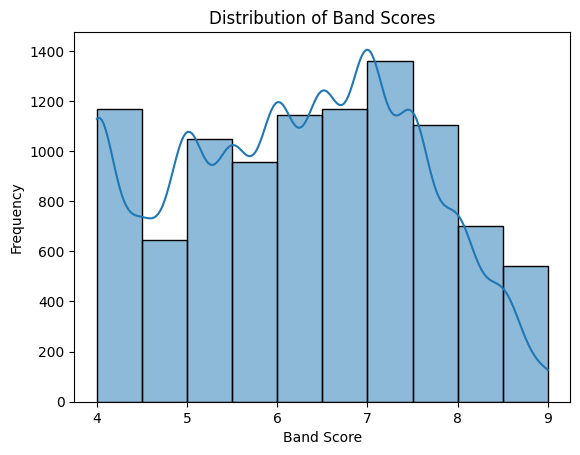

In [6]:
# Distribution of Scores (Band)
sns.histplot(df['band'], bins=10, kde=True)
plt.title("Distribution of Band Scores")
plt.xlabel("Band Score")
plt.ylabel("Frequency")
plt.show()

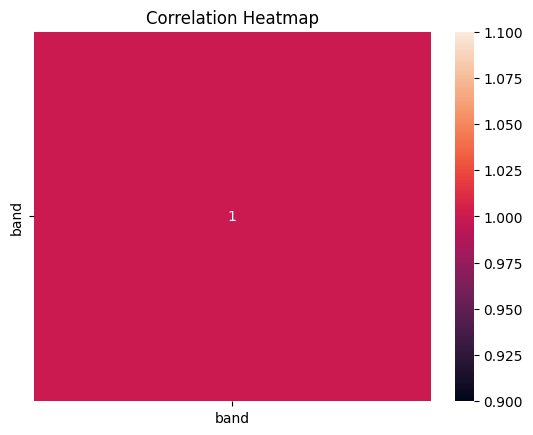

In [9]:
# Correlation Analysis
# (band is numerical; others are text—useful only with engineered features later)
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

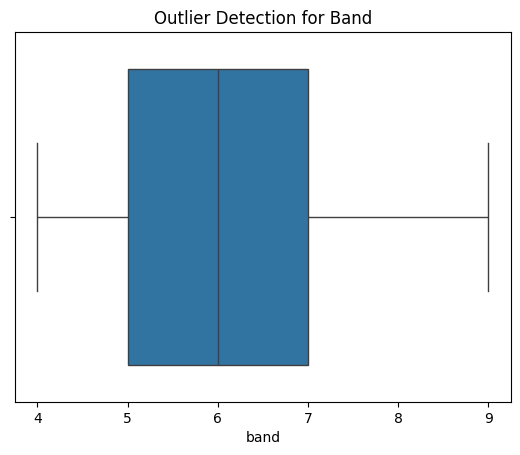

In [10]:
# Outlier Detection in Band Scores
sns.boxplot(x=df['band'])
plt.title("Outlier Detection for Band")
plt.show()

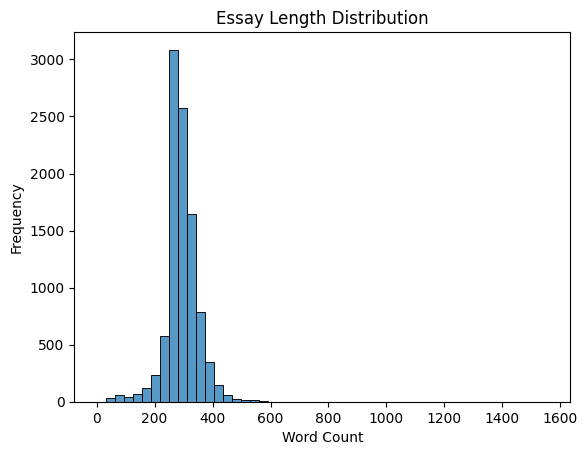

In [11]:
# Text Length Distribution
df['essay_length'] = df['essay'].apply(lambda x: len(x.split()))
sns.histplot(df['essay_length'], bins=50)
plt.title("Essay Length Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [12]:
# Most Frequent Words (Before Cleaning)
all_words = ' '.join(df['essay'].tolist()).lower()
words = re.findall(r'\b\w+\b', all_words)
common_words = Counter(words).most_common(30)
print("Most Common Words:", common_words)

Most Common Words: [('the', 145711), ('to', 105384), ('of', 80895), ('and', 73322), ('in', 71529), ('a', 57125), ('is', 46214), ('that', 44476), ('for', 40735), ('their', 33099), ('are', 32487), ('it', 30290), ('be', 28023), ('people', 26811), ('this', 26686), ('they', 25389), ('as', 24538), ('can', 23976), ('on', 23481), ('with', 20227), ('have', 18641), ('will', 17562), ('more', 16114), ('not', 15998), ('some', 15001), ('by', 14765), ('i', 14564), ('or', 12802), ('which', 12387), ('there', 11942)]


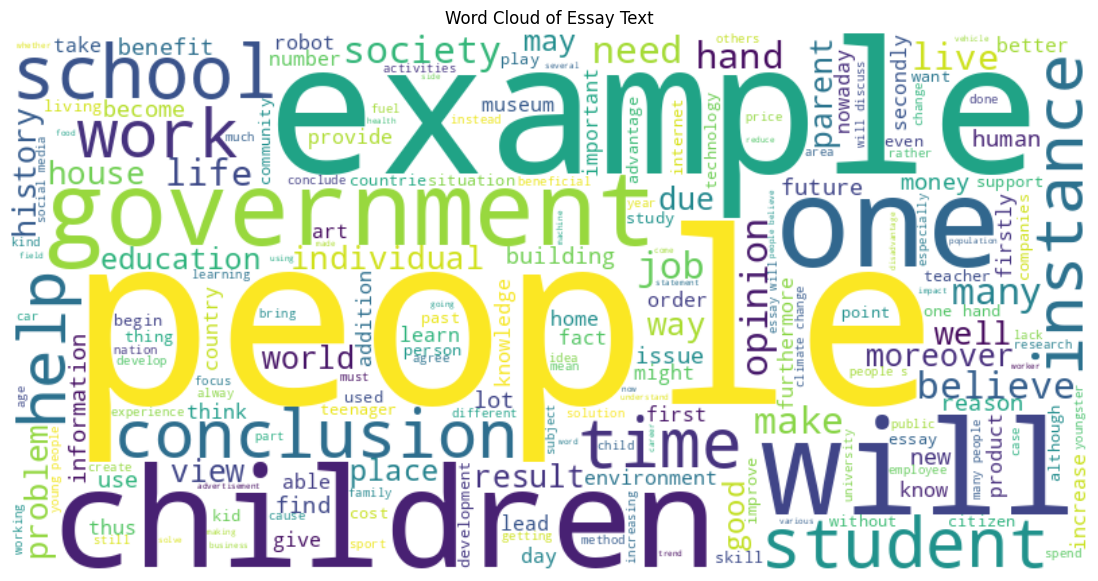

In [13]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Essay Text")
plt.show()

In [14]:
# Preprocessing – Clean Essay Text
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['clean_essay'] = df['essay'].apply(clean_text)

In [15]:
# Handling Missing Values
df.dropna(inplace=True)

In [16]:
# Feature Engineering – Text Length, Avg Word Length
df['avg_word_len'] = df['clean_essay'].apply(lambda x: np.mean([len(w) for w in x.split()]) if len(x.split()) > 0 else 0)


In [17]:
# Normalization/Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['essay_length', 'avg_word_len']] = scaler.fit_transform(df[['essay_length', 'avg_word_len']])


In [18]:
# Categorical Encoding (if needed)
# Currently, no categorical columns. If 'prompt' needs encoding:
# df['prompt_encoded'] = df['prompt'].astype('category').cat.codes

# Final Cleaned Data
print(df[['clean_essay', 'band', 'essay_length', 'avg_word_len']].head())

                                         clean_essay  band  essay_length  \
0  it is believed by some experts that the tradit...   7.5      1.109035   
1  nowadays numerous huge firms allocate an inter...   5.0      0.264128   
2  the interview section is the most vital part o...   5.5      1.867726   
3  it is argued that the best method to recruit e...   5.5      1.109035   
4  nowadays many companies conduct interviews bef...   4.0     -1.322226   

   avg_word_len  
0     -0.728468  
1     -0.021750  
2     -1.088698  
3      0.436832  
4     -0.591842  
